In [45]:
# Import libraries and modules 
# Import libraries and modules 
import numpy as np 
import time 
np.random.seed(123) 
# for reproducibility

from matplotlib import pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

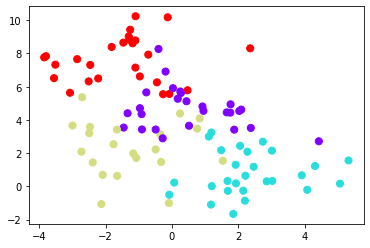

In [3]:
[X_train, y_train, X_test, y_test] = np.load("TP5a.npy",allow_pickle=True)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='rainbow'); 
plt.show()

In [6]:
print("nombre de points de la base d'apprentissage",len(X_train[:, 0]))
print('nombre de points de la base de test ',len(X_test[:, 0]))
print("dimension des données",len(X_train[0, :]))

nombre de points de la base d'apprentissage 100
nombre de points de la base de test  4900
dimension des données 2


In [7]:
# Principe des arbres de décision

def visualize_classifier(model, X, y):
  ax = plt.gca() 
  # Plot the training points 
  ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow', clim=(y.min(), y.max()), zorder=3) 
  ax.axis('tight') 
  ax.axis('off') 
  xlim = ax.get_xlim() 
  ylim = ax.get_ylim() 
  xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200)) 
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) 
  # Create a color plot with the results 
  n_classes = len(np.unique(y)) 
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap='rainbow', zorder=1) 
  ax.set(xlim=xlim, ylim=ylim)
  plt.show()

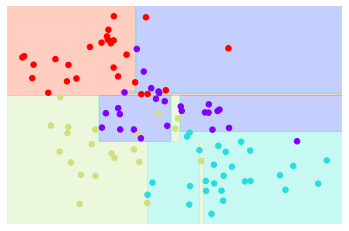

In [29]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth = 5) 
# max_depth c'est le nombre de split maximum pour chaque branche
tree.fit(X_train, y_train) 
visualize_classifier(tree, X_train, y_train)

In [30]:
# Performance d’un classifieur muti-classes
y_pred = tree.predict(X_test) 
C=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.68      0.59      1224
           1       0.77      0.83      0.80      1223
           2       0.72      0.64      0.68      1229
           3       0.88      0.68      0.77      1224

    accuracy                           0.71      4900
   macro avg       0.73      0.71      0.71      4900
weighted avg       0.73      0.71      0.71      4900



In [ ]:
# Optimisation de la profondeur de l’arbre
# pour maw_depth = 5 , on a le maximum de précision


In [38]:
# Classification avec un arbre de décision
[X_train, y_train, X_test, y_test] = np.load("TP5b.npy",allow_pickle=True)
print("nombre de points de la base d'apprentissage",len(X_train[:, 0]))
print('nombre de points de la base de test ',len(X_test[:, 0]))
print("dimension des données",len(X_train[0, :]))

nombre de points de la base d'apprentissage 966
nombre de points de la base de test  322
dimension des données 50


In [40]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth = 30) 
tree.fit(X_train, y_train) 
y_pred = tree.predict(X_test) 
C=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
# quand la dimension des données d'apprentissage est très grande, la classification est mauvaise

              precision    recall  f1-score   support

           0       0.17      0.31      0.22        13
           1       0.43      0.42      0.42        60
           2       0.29      0.30      0.29        27
           3       0.62      0.58      0.60       146
           4       0.13      0.16      0.15        25
           5       0.29      0.33      0.31        15
           6       0.20      0.17      0.18        36

    accuracy                           0.42       322
   macro avg       0.30      0.32      0.31       322
weighted avg       0.44      0.42      0.43       322



In [44]:
# Forêt d’arbres aléatoires
RF = RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.69      0.78      0.73        60
           2       0.67      0.44      0.53        27
           3       0.67      0.92      0.78       146
           4       0.40      0.16      0.23        25
           5       0.83      0.33      0.48        15
           6       0.64      0.25      0.36        36

    accuracy                           0.67       322
   macro avg       0.70      0.46      0.51       322
weighted avg       0.67      0.67      0.63       322

